## Reference
> Vivek Srinivasan's EDA & Ensemble Model (Top 10 Percentile)
> https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile

"""
Bike Sharing Demand 진행방향
1) 훈련, 테스트 데이터셋의 형태 및 컬럼의 속성 데이터 값 파악
2) 데이터 전처리 및 시각화
3) 회귀모델 적용
4) 결론 도출

함수 사용시 꿀팁

함수를 적용 시 내부 파라미터들을 모를 때 Anaconda Prompt or Windows PowerShell을 활용하여 내부의 REPL python 명령창에서

ex)) pandas.to_numeric() 함수의 내부 parameter를 알고 싶다면
help(pandas.to_numeric)하게 되면, 함수의 사용법 등 문서를 열람할 수 있음
=> 제가 굉장히 많이 씁니다!!

"""

## Data EDA

In [1]:
"""필요 라이브러리들 호출"""

import warnings
warnings.filterwarnings('ignore')


import numpy as np 
import pandas as pd 
import seaborn as sns #시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime


In [2]:
"""
1) 훈련, 테스트 데이터셋의 개괄적인 형태 및 데이터의 컬럼의 속성 및 값의 개수 파악
"""

#훈련데이터와 테스트 데이터 세트를 불러온다
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
#훈련데이터 셋의 개괄적인 모형 파악
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
#데이터 셋 내에 있는 컬럼 속성들에 대한 설명

"""
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter : 중요
holiday - whether the day is considered a holiday :중요
workingday - whether the day is neither a weekend nor holiday : 중요
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy - 쾌청
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist - 흐림
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - 비,눈
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog - 재해
temp - temperature in Celsius : 중요
atemp - "feels like" temperature in Celsius - 체감온도 - 온도보다 더 중요
humidity - relative humidity : 중요
windspeed - wind speed 
casual - number of non-registered user rentals initiated -비회원의 대여횟수
registered - number of registered user rentals initiated -회원의 대여횟수
count - number of total rentals -총 대여횟수
-- 날씨 관련 feature들을 활용한 대여 예측
"""

#훈련 데이터셋의 각 컬럼별 데이터타입 및 값의 갯수 파악
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
#테스트 데이터 셋의 개괄적인 형태 출력
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
""" 2) 데이터 전처리 및 시각화 """

#datetime속성을 분리하여 추출속성으로 활용하기 위해 split함수를 사용하여 년-월-일 과 시간을 분리한다.
train['tempDate'] = train.datetime.apply(lambda x:x.split())
train['tempDate']

0        [2011-01-01, 00:00:00]
1        [2011-01-01, 01:00:00]
2        [2011-01-01, 02:00:00]
3        [2011-01-01, 03:00:00]
4        [2011-01-01, 04:00:00]
                  ...          
10881    [2012-12-19, 19:00:00]
10882    [2012-12-19, 20:00:00]
10883    [2012-12-19, 21:00:00]
10884    [2012-12-19, 22:00:00]
10885    [2012-12-19, 23:00:00]
Name: tempDate, Length: 10886, dtype: object

In [7]:
#분리한 tempDate를 가지고 년-월-일을 이용하여 year,month,day 그리고 weekday column을 추출한다.
# split() 내장함수 설명: https://wikidocs.net/13 [문자형 자료형_ 문자열 나누기] <=> join() [문자형 자료형_ 문자열 삽입]
train['year'] = train.tempDate.apply(lambda x:x[0].split('-')[0])
train['month'] = train.tempDate.apply(lambda x:x[0].split('-')[1])
train['day'] = train.tempDate.apply(lambda x:x[0].split('-')[2])
#weekday는 calendar패키지와 datetime패키지를 활용한다.
#calendar.day_name 사용법 : https://stackoverflow.com/questions/36341484/get-day-name-from-weekday-int
#datetime.strptime 문서: https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
#파이썬에서 날짜와 시간 다루기: https://datascienceschool.net/view-notebook/465066ac92ef4da3b0aba32f76d9750a/ 
train['weekday'] = train.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])

train['hour'] = train.tempDate.apply(lambda x:x[1].split(':')[0])

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  year        10886 non-null  object 
 14  month       10886 non-null  object 
 15  day         10886 non-null  object 
 16  weekday     10886 non-null  object 
 17  hour        10886 non-null  object 
dtypes: float64(3), int64(8), object(7)
memory usage: 1.5+ MB


In [9]:
#분리를 통해 추출된 속성은 문자열 속성을 가지고 있음 따라서 숫자형 데이터로 변환해 줄 필요가 있음.
#pandas.to_numeric(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html
# errors='coerce'는 숫자로 변환할 수 없는 값은 NaN으로 변환한다.
train['year'] = pd.to_numeric(train.year,errors='coerce')
train['month'] = pd.to_numeric(train.month,errors='coerce')
train['day'] = pd.to_numeric(train.day,errors='coerce')
train['hour'] = pd.to_numeric(train.hour,errors='coerce')

In [10]:
#year,month,day,hour가 숫자형으로 변환되었음을 알 수 있음.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  weekday     10886 non-null  object 
 17  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


In [11]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"[2011-01-01, 00:00:00]",2011,1,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,"[2011-01-01, 01:00:00]",2011,1,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,"[2011-01-01, 02:00:00]",2011,1,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,"[2011-01-01, 03:00:00]",2011,1,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,"[2011-01-01, 04:00:00]",2011,1,1,Saturday,4


In [12]:
#필요를 다한 tempDate column을 drop함
train = train.drop('tempDate',axis=1)

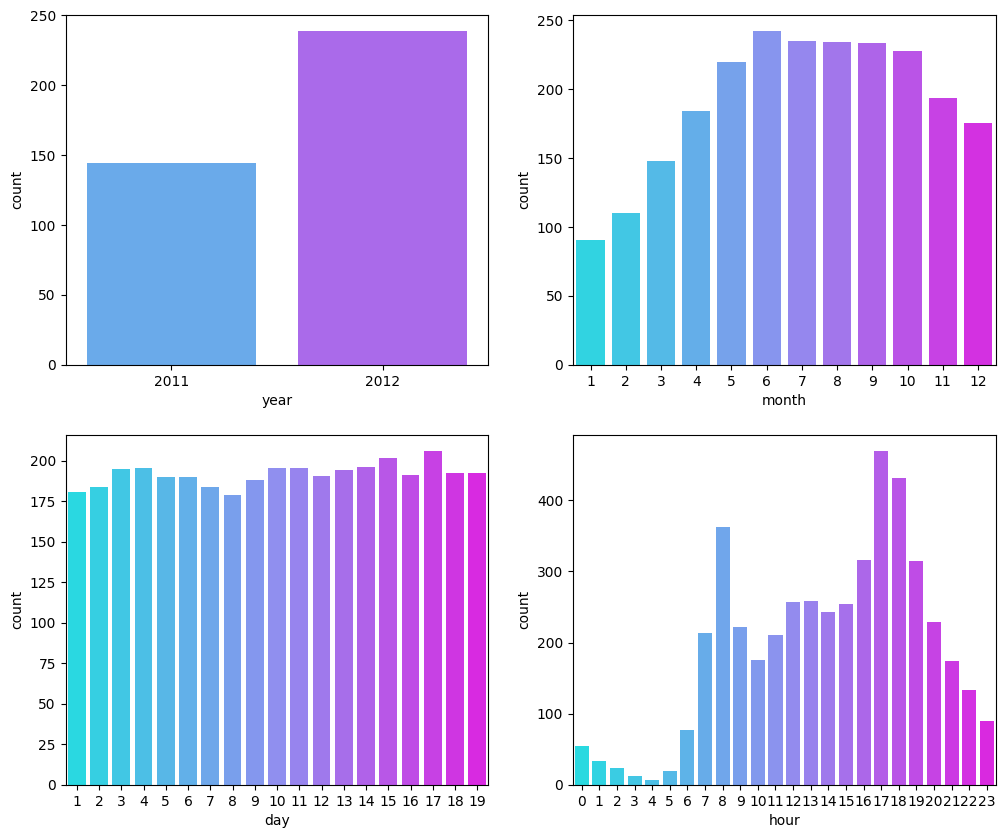

In [13]:
#각각의 속성과 예측의 결과값으로 쓰이는 count값과의 관계 파악

#년도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year',y='count',data=train.groupby('year')['count'].mean().reset_index(),palette='cool')

#month와 count - 추운겨울보다 따뜻한 봄,여름,가을에 대여량이 많음
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index(),palette='cool')

#day와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day',y='count',data=train.groupby('day')['count'].mean().reset_index(),palette='cool')

#hour와 count - 출퇴근 시간에 대여량이 많음:8시, 17시
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour',y='count',data=train.groupby('hour')['count'].mean().reset_index(),palette='cool')

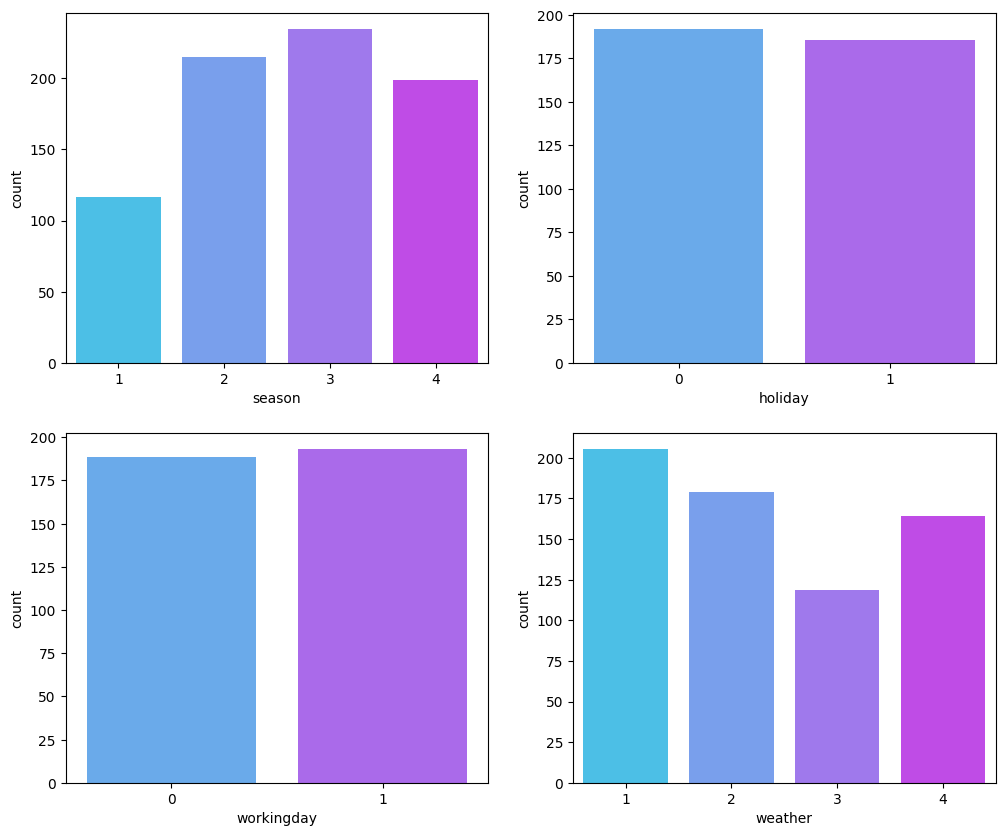

In [14]:
#계절과 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index(),palette='cool')

#휴일 여부와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index(),palette='cool')

#작업일 여부와 count 
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index(),palette='cool')

#날씨와 count 
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index(),palette='cool')

In [15]:
# season이 1인경우
display(train[train.season == 1].head(), train[train.season == 1].tail())


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,4


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
6780,2012-03-19 19:00:00,1,0,1,1,25.42,30.305,61,15.0013,86,463,549,2012,3,19,Monday,19
6781,2012-03-19 20:00:00,1,0,1,1,24.60,30.305,64,15.0013,34,296,330,2012,3,19,Monday,20
6782,2012-03-19 21:00:00,1,0,1,1,24.60,30.305,64,11.0014,33,190,223,2012,3,19,Monday,21
6783,2012-03-19 22:00:00,1,0,1,2,22.96,26.515,73,11.0014,17,131,148,2012,3,19,Monday,22
6784,2012-03-19 23:00:00,1,0,1,2,22.96,26.515,78,8.9981,9,45,54,2012,3,19,Monday,23


In [16]:
"""
해당 부분은 필자가 스스로 데이터를 보고 이상함을 느껴 전처리함.
왜냐하면, 처음 import한 데이터 셋에서 head()를 하였을 때 1월1일의 season column은 1 즉 봄을 가르키는데,
직접 3월에 washington을 직접 가본 결과 1월은 확실히 겨울이다.
따라서 아래의 badToRight를 이용하여 season column을 수정하고자 했음.
이 데이터 때문에 참조했던 커널과는 다른 정확도를 나타낼 수 있음.
참고 : https://ko.weatherspark.com/y/20957/미국-컬럼비아-특별구-워싱턴-D.C.에서-년중-평균-날씨#google_vignette
"""

def badToRight(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3

#apply() 내장함수는 split(),map(),join(),filter()등 과 함꼐 필수적으로 숙지해야 할 함수이다.
train['season'] = train.month.apply(badToRight)

In [17]:
# season이 1인경우 : 재설정 후
display(train[train.season == 1].head(), train[train.season == 1].tail())


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
877,2011-03-01 00:00:00,1,0,1,1,12.30,13.635,70,31.0009,0,7,7,2011,3,1,Tuesday,0
878,2011-03-01 01:00:00,1,0,1,1,10.66,11.365,70,23.9994,0,3,3,2011,3,1,Tuesday,1
879,2011-03-01 02:00:00,1,0,1,1,9.84,10.605,65,26.0027,0,4,4,2011,3,1,Tuesday,2
880,2011-03-01 03:00:00,1,0,1,1,9.02,10.605,69,19.0012,0,2,2,2011,3,1,Tuesday,3
881,2011-03-01 04:00:00,1,0,1,1,9.02,10.605,69,16.9979,0,1,1,2011,3,1,Tuesday,4


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
7690,2012-05-19 19:00:00,1,0,0,1,28.70,31.82,39,8.9981,203,229,432,2012,5,19,Saturday,19
7691,2012-05-19 20:00:00,1,0,0,1,27.88,31.82,41,6.0032,118,197,315,2012,5,19,Saturday,20
7692,2012-05-19 21:00:00,1,0,0,1,26.24,31.06,50,0.0000,81,178,259,2012,5,19,Saturday,21
7693,2012-05-19 22:00:00,1,0,0,1,26.24,31.06,47,0.0000,104,234,338,2012,5,19,Saturday,22
7694,2012-05-19 23:00:00,1,0,0,1,24.60,31.06,56,11.0014,71,168,239,2012,5,19,Saturday,23


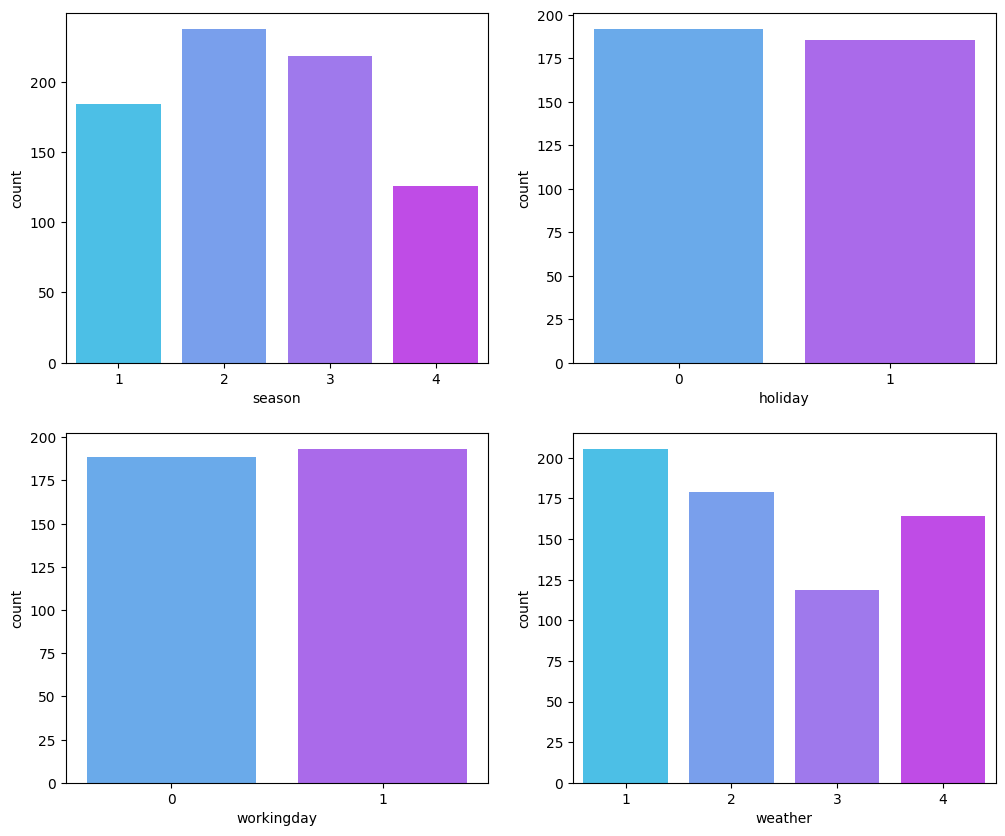

In [18]:
#계절과 count - 봄,여름,가을에 대여량이 많음, 특히 가을에 가장 많음
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index(),palette='cool')

#휴일 여부와 count - 비슷 ,이유 추청: 출근떄도 대여량이 많음
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index(),palette='cool')

#작업일 여부와 count - 비슷 ,이유 추청: 출근때도 대여량이 많음
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index(),palette='cool')

#날씨와 count - weather이 4일때는 데이터 포인트가 1개여서 평균값이 전체 count로 잡힘 : 왜곡
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index(),palette='cool')

In [19]:
# weather 각 개수 확인
train.weather.value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [20]:
train[train.weather == 4]   

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
5631,2012-01-09 18:00:00,4,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,Monday,18


In [21]:
# weather별 총 count값 확인
train.groupby('weather')['count'].sum()

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

In [22]:
total_data_points = len(train)


weather_counts = train['weather'].value_counts()


weights = weather_counts / total_data_points


weather_mean_counts = train.groupby('weather')['count'].mean()


weighted_means = weather_mean_counts * weights


print(weights)
print()
print(weather_mean_counts)
print()
print(weighted_means)

weather
1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: count, dtype: float64

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

weather
1    135.592780
2     46.588279
3      9.378008
4      0.015065
Name: count, dtype: float64


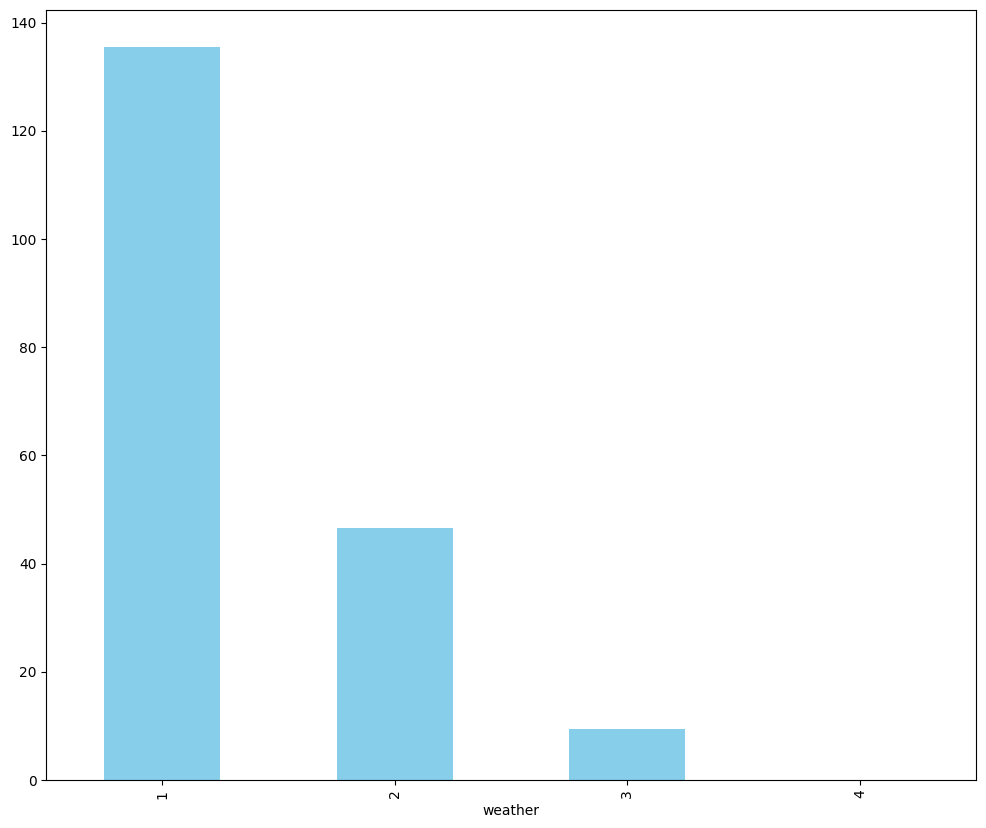

In [23]:
# 가중치를 고려한 날씨별 count값 시각화
fig = plt.figure(figsize=[12,10])
ax = fig.add_subplot(1,1,1)
ax = weighted_means.plot(kind='bar',color='skyblue')

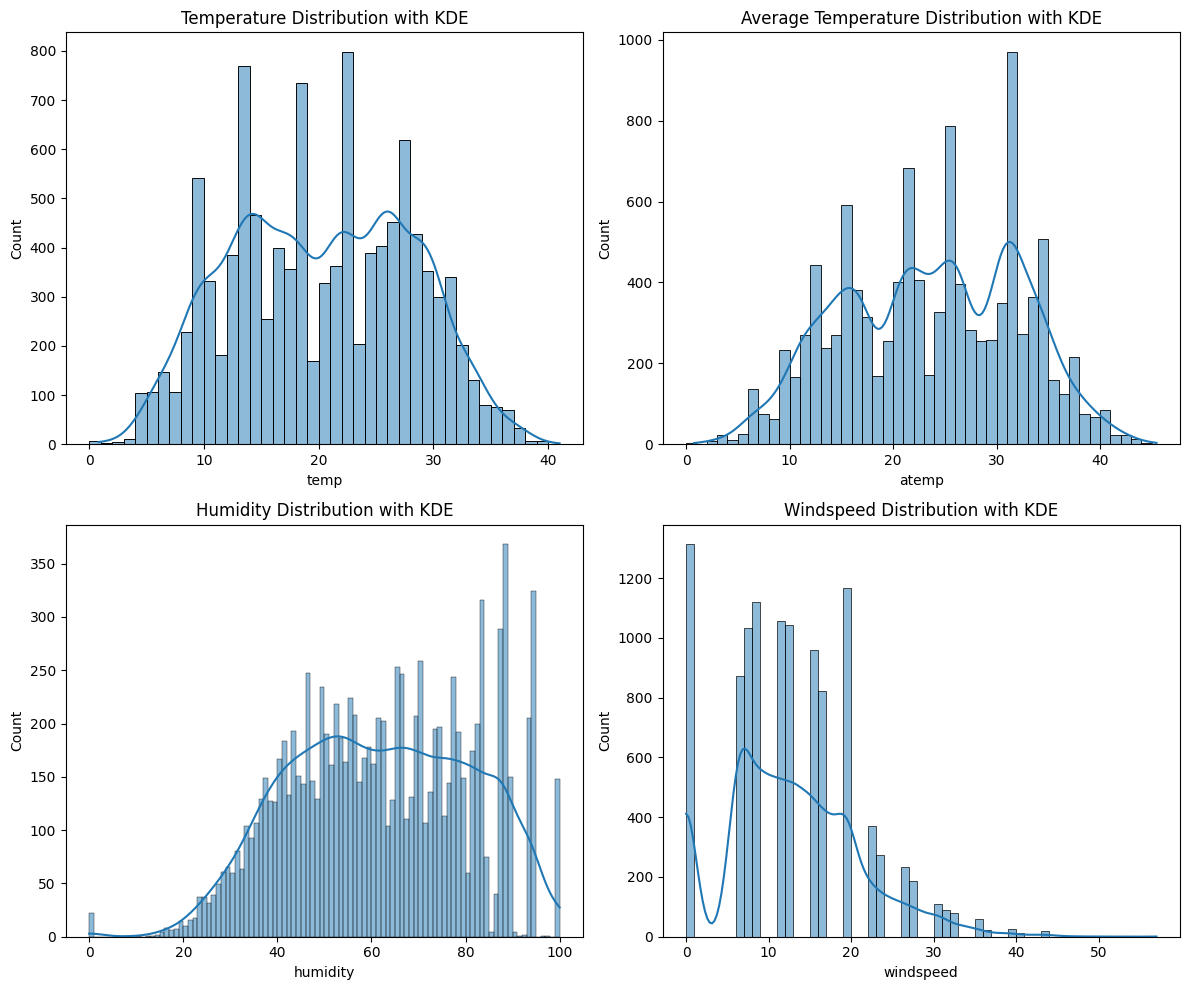

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. 온도와 count
sns.histplot(train['temp'], bins=range(int(train['temp'].min()), int(train['temp'].max()) + 1), kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Temperature Distribution with KDE')

# 2. 평균 온도와 count
sns.histplot(train['atemp'], bins=range(int(train['atemp'].min()), int(train['atemp'].max()) + 1), kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Average Temperature Distribution with KDE')

# 3. 습도와 count
sns.histplot(train['humidity'], bins=range(int(train['humidity'].min()), int(train['humidity'].max()) + 1), kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Humidity Distribution with KDE')

# 4. 바람 속도와 count
sns.histplot(train['windspeed'], bins=range(int(train['windspeed'].min()), int(train['windspeed'].max()) + 1), kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Windspeed Distribution with KDE')

# Adjusting layout
plt.tight_layout()
plt.show()

In [25]:
# windspeed 값 확인하기 - 0인 값이 많음 : 이유 추정 - 측정되지 않은 값은 0으로 표기되었을 수 있음
train.windspeed.value_counts()

windspeed
0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: count, dtype: int64

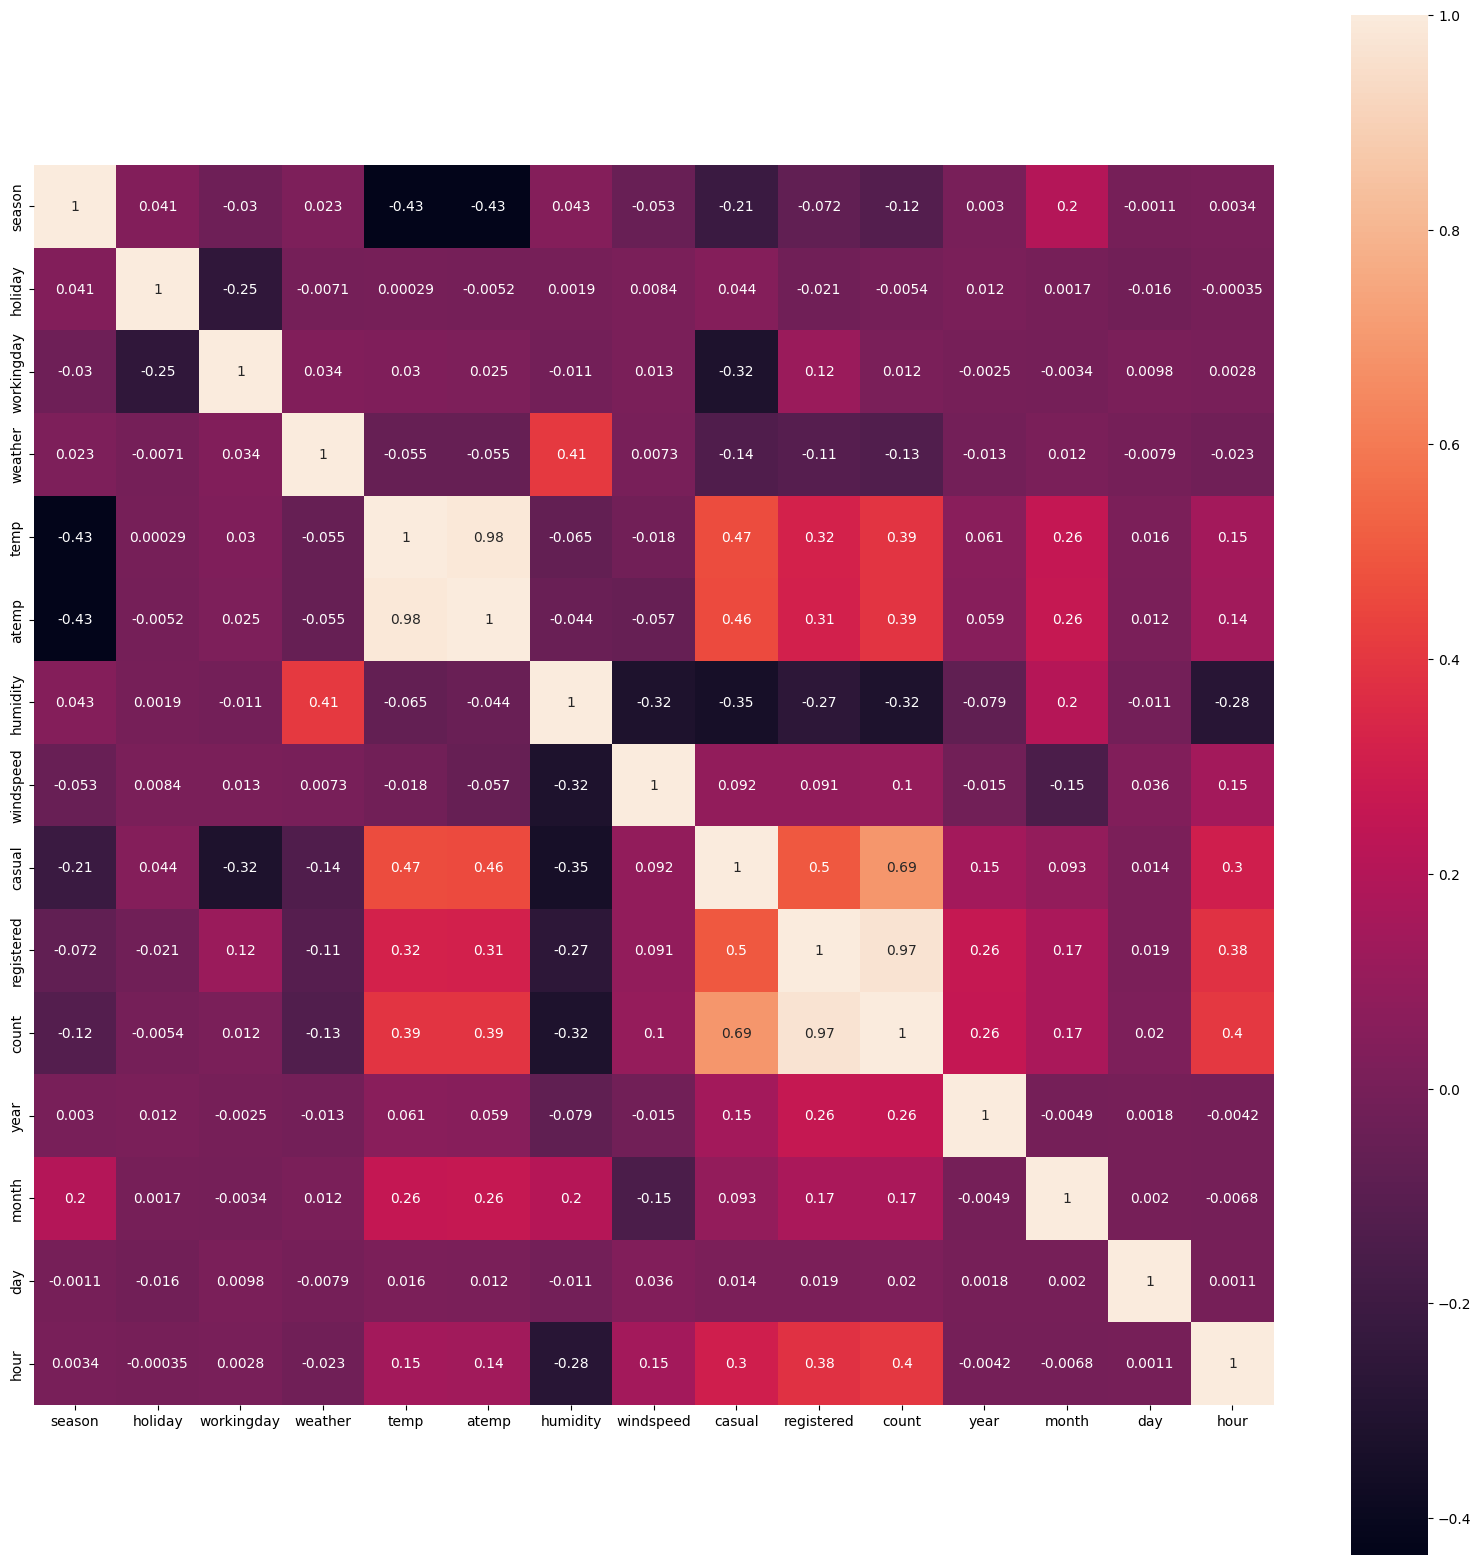

In [26]:
#각각의 컬럼들 간의 상관계수를 heatmap을 통해 시각화

fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.select_dtypes(include=['float64', 'int64']).corr(),annot=True,square=True)

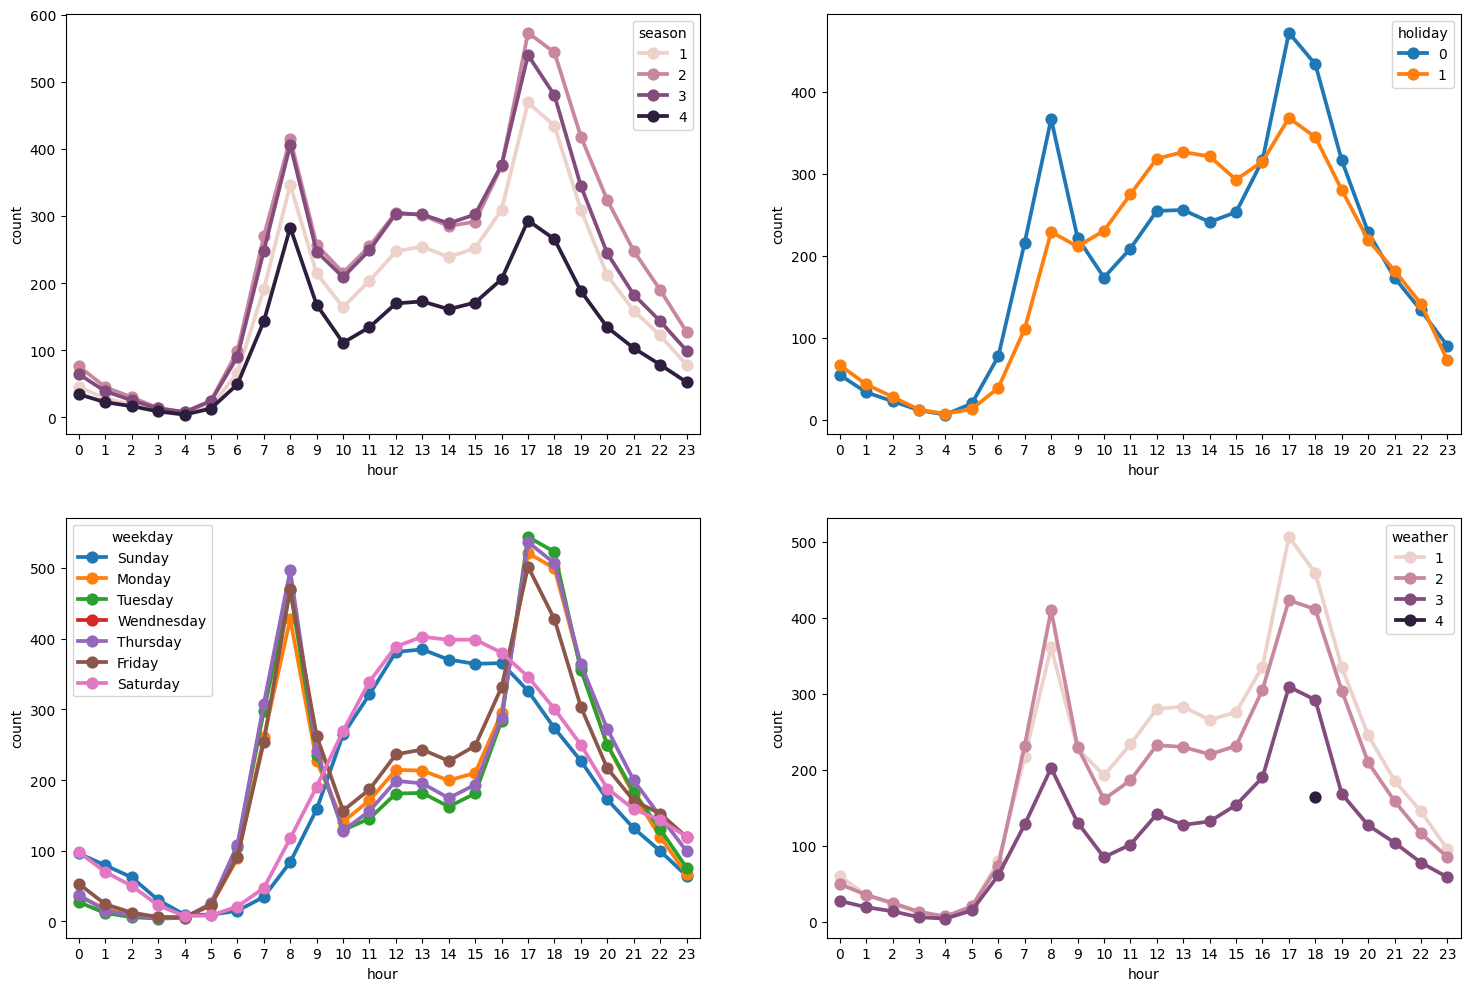

In [27]:
#heatmap 상관관계를 참조하여 이전의 시각화와는 달리 두 개의 서로다른 컬럼이 적용된 count를 시각화해보자

#시간과 계절에 따른 count
fig = plt.figure(figsize=[18,12])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.pointplot(x='hour',y='count',hue='season',data=train.groupby(['season','hour'])['count'].mean().reset_index())

#시간과 공휴일 여부에 따른 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.pointplot(x='hour',y='count',hue='holiday',data=train.groupby(['holiday','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count  : 휴일은 주로 낮시간대에 많이 타고 고르게 본포, 나머지는 출 퇴근 시간에 많이 탐
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.pointplot(x='hour',y='count',hue='weekday',hue_order=['Sunday','Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday'],data=train.groupby(['weekday','hour'])['count'].mean().reset_index())

#시간과 날씨에 따른 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.pointplot(x='hour',y='count',hue='weather',data=train.groupby(['weather','hour'])['count'].mean().reset_index())

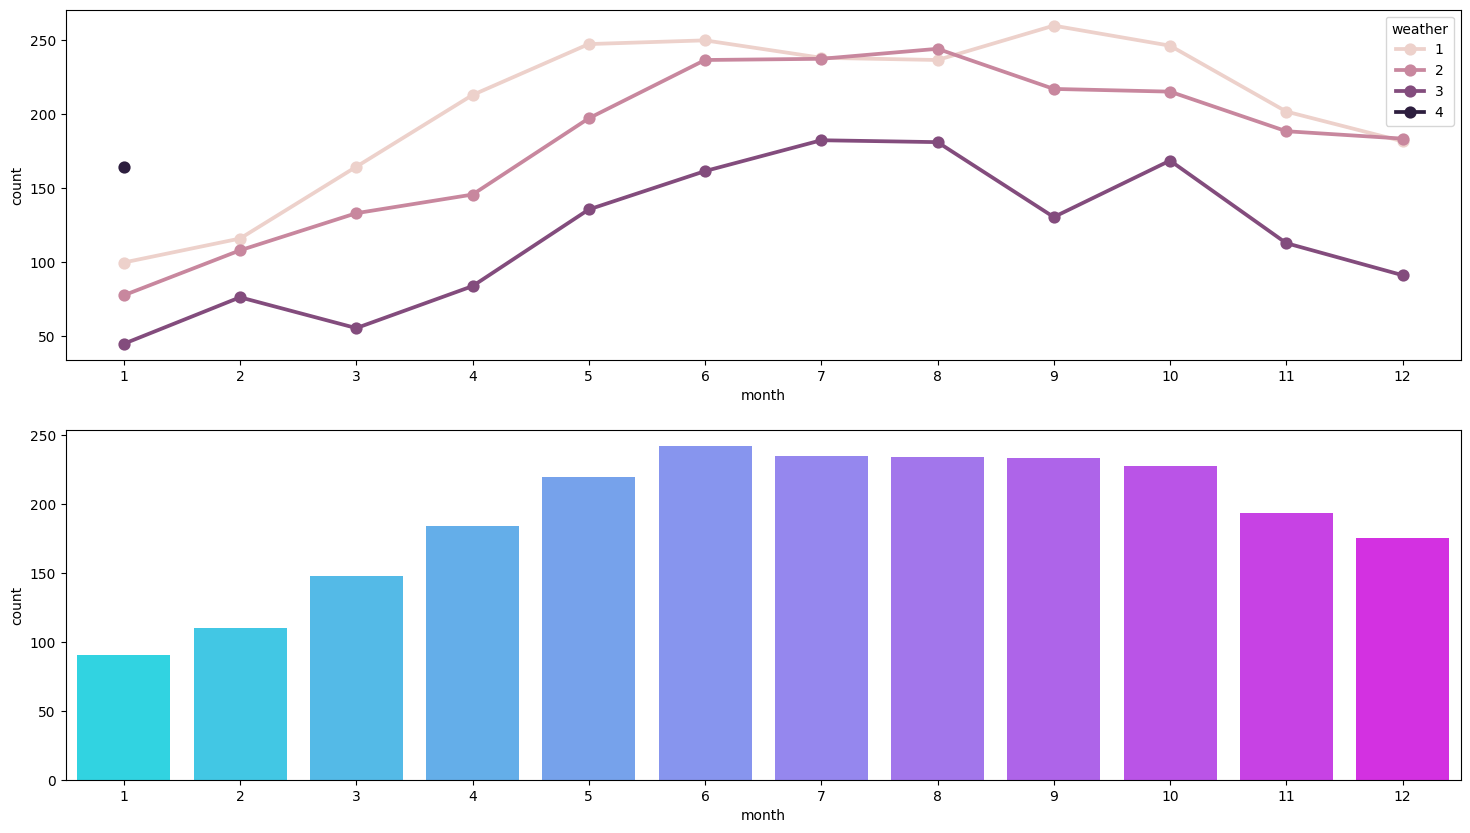

In [28]:
#달과 날씨에 따른 count : 날씨가 좋을 때 대여량이 많음, 여름(6~8)월에 상대적으로 많음
fig = plt.figure(figsize=[18,10])
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.pointplot(x='month',y='count',hue='weather',data=train.groupby(['weather','month'])['count'].mean().reset_index())

#달별 count
ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index(),palette='cool')

In [29]:
"""
Windspeed 분포를 표현한 그래프에서 Windspeed가 0인 값들이 많았는데,
이는 실제로 0이었던지 or 값을 제대로 측정하지 못해서 0인지 두 개의 경우가 있다.
하지만 후자의 생각을 가지고 우리의 데이터를 활용하여 windspeed값을 부여해보자
"""

#머신러닝 모델에 훈련시킬 때는 문자열 값은 불가능하기 때문에 문자열을 카테고리화 하고 각각에 해당하는 값을 숫자로 변환해준다
train['weekday']= train.weekday.astype('category')

In [30]:
print(train['weekday'].cat.categories)

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')


In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

label_encoders['weekday'] = LabelEncoder()
train['weekday'] = label_encoders['weekday'].fit_transform(train['weekday'])

In [32]:
train.weekday.value_counts()

weekday
2    1584
3    1579
4    1553
1    1551
6    1551
5    1539
0    1529
Name: count, dtype: int64

In [33]:
# best model 찾기
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import time

#Windspeed가 0인 데이터프레임
windspeed_0 = train[train.windspeed == 0]
#Windspeed가 0이 아닌 데이터프레임
windspeed_Not0 = train[train.windspeed != 0]

#Windspeed가 0인 데이터 프레임에 투입을 원치 않는 컬럼을 배제
windspeed_0_df = windspeed_0.drop(['windspeed','casual','registered','count','datetime'],axis=1)

#Windspeed가 0이 아닌 데이터 프레임은 위와 동일한 데이터프레임을 형성하고 학습시킬 Windspeed Series를 그대로 둠
windspeed_Not0_df = windspeed_Not0.drop(['windspeed','casual','registered','count','datetime'],axis=1)
windspeed_Not0_series = windspeed_Not0['windspeed'] 

X = windspeed_Not0_df
y = windspeed_Not0_series


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42)
}

param_grid = {
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    'LightGBM': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}
}

best_models = {}
for model_name, model in tqdm(models.items(), desc="Training models"):
    print(f"Training {model_name}...")
    
    # Start the timer
    start_time = time.time()
    
    # Perform GridSearchCV with tqdm to show progress
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Save the best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Predict and evaluate
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    elapsed_time = time.time() - start_time
    
    print(f"{model_name} - Best Params: {grid_search.best_params_}, MSE: {mse}, Time: {elapsed_time:.2f} seconds")
    
best_model_name, best_mse = None, float('inf')

for model_name, model in tqdm(best_models.items(), desc="Evaluating best model"):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    if mse < best_mse:
        best_model_name = model_name
        best_mse = mse


Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training RandomForest...


Training models:  25%|██▌       | 1/4 [00:14<00:44, 14.77s/it]

RandomForest - Best Params: {'max_depth': 20, 'n_estimators': 200}, MSE: 22.293134299175314, Time: 14.77 seconds
Training KNN...
KNN - Best Params: {'n_neighbors': 5}, MSE: 35.16393210789849, Time: 0.10 seconds
Training XGBoost...


Training models:  75%|███████▌  | 3/4 [00:15<00:04,  4.16s/it]

XGBoost - Best Params: {'learning_rate': 0.1, 'n_estimators': 200}, MSE: 21.595010921550553, Time: 0.79 seconds
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 263
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 264
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 266
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001794 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 263
[LightGBM] [Info] Number of data points in the train set: 6126, number of used features

Training models: 100%|██████████| 4/4 [00:27<00:00,  6.94s/it]


LightGBM - Best Params: {'learning_rate': 0.1, 'n_estimators': 200}, MSE: 21.2644814601986, Time: 12.11 seconds


Evaluating best model: 100%|██████████| 4/4 [00:00<00:00, 39.14it/s]


In [34]:
model_performance = {}

for model_name, model in best_models.items():
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    model_performance[model_name] = {
        'MSE': mse,
        'Best Params': model.get_params()
    }

for model_name, performance in model_performance.items():
    print(f"Model: {model_name}")
    print(f"  - MSE: {performance['MSE']}")
    print(f"  - Best Params: {performance['Best Params']}")
    print("\n")

Model: RandomForest
  - MSE: 22.293134299175314
  - Best Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Model: KNN
  - MSE: 35.16393210789849
  - Best Params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


Model: XGBoost
  - MSE: 21.595010921550553
  - Best Params: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feat

In [35]:
best_model = best_models[best_model_name] 

predicted_windspeed_0 = best_model.predict(windspeed_0_df)
windspeed_0['windspeed'] = predicted_windspeed_0

train_updated = pd.concat([windspeed_0, windspeed_Not0], axis=0)
train_updated = train_updated.sort_values(by=['datetime'])

Min value of windspeed is 2.7855465696851676


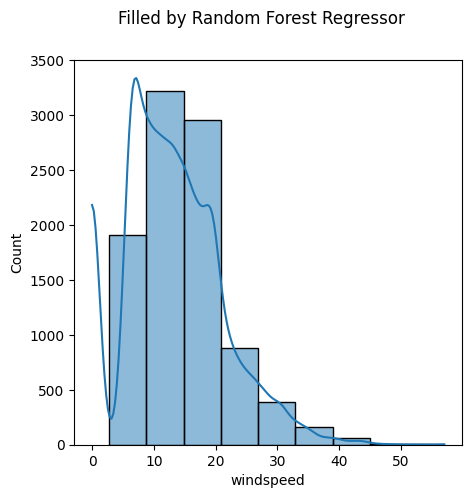

In [36]:
fig = plt.figure(figsize=[5,5])
sns.histplot(train['windspeed'],bins=np.linspace(train_updated['windspeed'].min(),train_updated['windspeed'].max(),10),kde=True)
plt.suptitle("Filled by Random Forest Regressor")
print("Min value of windspeed is {}".format(train_updated['windspeed'].min()))

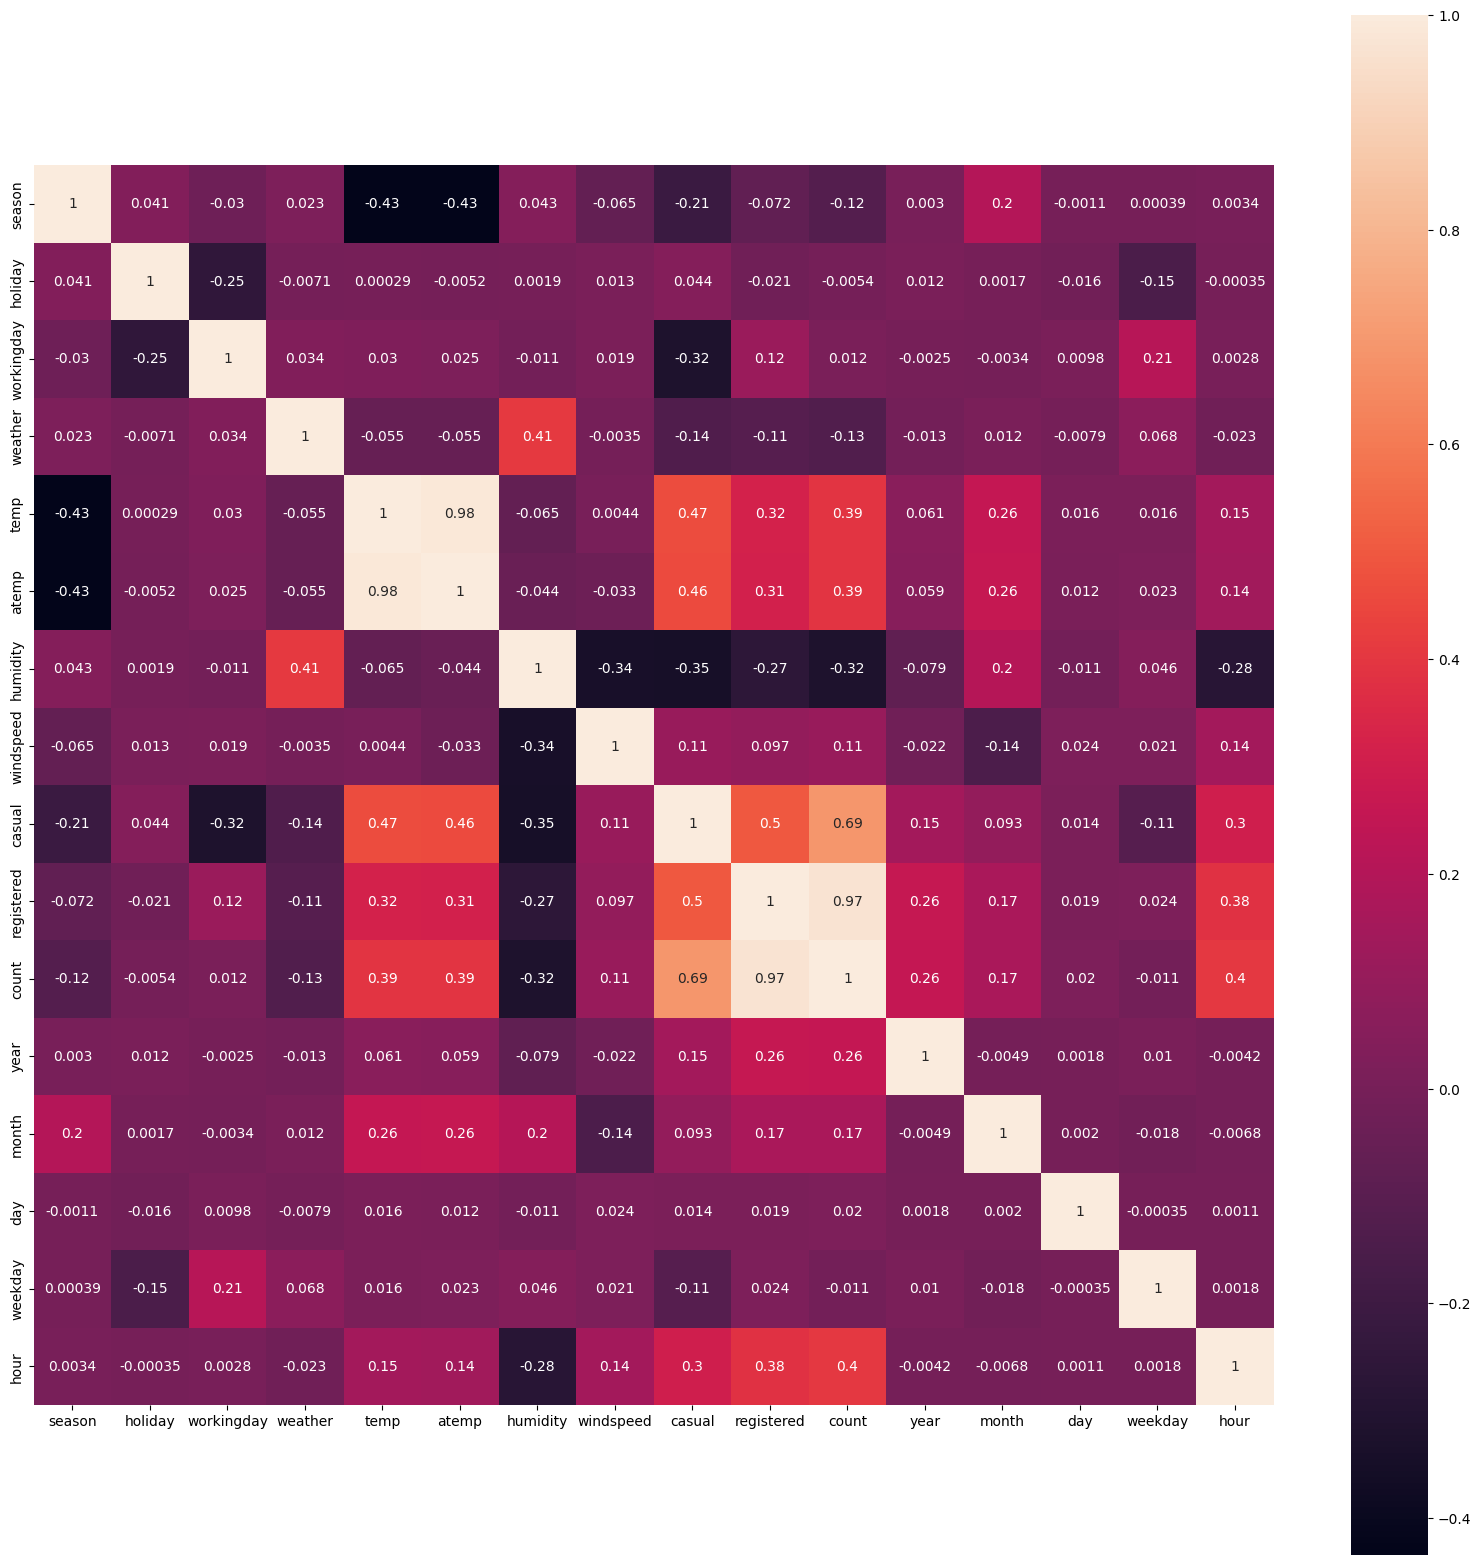

In [37]:
fig = plt.figure(figsize=[20, 20]) # - 큰 차이 없음 0.11 상관계수
ax = sns.heatmap(train_updated.select_dtypes(include=['float64', 'int64']).corr(), annot=True, square=True)
plt.show()

In [1]:
'''
추가적인 데이터 혹은 feature정보가 있으면 더 정확한 예측 가능
- 자전거 대여소의 위치 정보 :  대여소가 교통 요충지나 인구 밀집 지역에 가까울수록 대여량이 많을 수 있음, 대여소별 위치와 해당 위치의 인구 밀도 또는 교통량 데이터를 추가 가능
- 도로 유형 :  대여소 근처의 자전거 도로 여부나 차량 통행이 많은도로의 경우 걷거나 자전거 대중교통을 이용하는 사람들이 많을 수 있음
- 소셜 미디어 및 검색 트렌드 데이터 : 현재 런닝이 뜨는 것처럼 이런것들을 SNS에 공유함으로서 취미를 즐기는 사람이 늘어나는 것 처럼 자전거도 만약 트렌드를 탄다면 대여량이 늘어날 수 있음
'''

'\n추가적인 데이터 혹은 feature정보가 있으면 더 정확한 예측 가능\n- 자전거 대여소의 위치 정보 :  대여소가 교통 요충지나 인구 밀집 지역에 가까울수록 대여량이 많을 수 있음, 대여소별 위치와 해당 위치의 인구 밀도 또는 교통량 데이터를 추가 가능\n- 도로 유형 :  대여소 근처의 자전거 도로 여부나 차량 통행이 많은도로의 경우 걷거나 자전거 대중교통을 이용하는 사람들이 많을 수 있음\n- 소셜 미디어 및 검색 트렌드 데이터 : 현재 런닝이 뜨는 것처럼 이런것들을 SNS에 공유함으로서 취미를 즐기는 사람이 늘어나는 것 처럼 자전거도 만약 트렌드를 탄다면 대여량이 늘어날 수 있음\n'

## 예측

### data preprocessing

In [38]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

combine = pd.concat([train, test], axis=0)

In [39]:
combine['tempDate'] = combine.datetime.apply(lambda x:x.split())
combine['weekday'] = combine.tempDate.apply(lambda x: calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])
combine['year'] = combine.tempDate.apply(lambda x: x[0].split('-')[0])
combine['month'] = combine.tempDate.apply(lambda x: x[0].split('-')[1])
combine['day'] = combine.tempDate.apply(lambda x: x[0].split('-')[2])
combine['hour'] = combine.tempDate.apply(lambda x: x[1].split(':')[0])

In [40]:
combine['year'] = pd.to_numeric(combine.year,errors='coerce')
combine['month'] = pd.to_numeric(combine.month,errors='coerce')
combine['day'] = pd.to_numeric(combine.day,errors='coerce')
combine['hour'] = pd.to_numeric(combine.hour,errors='coerce')

In [41]:
combine['season'] = combine.month.apply(badToRight)

In [42]:
combine

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,"[2011-01-01, 00:00:00]",Saturday,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,"[2011-01-01, 01:00:00]",Saturday,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,"[2011-01-01, 02:00:00]",Saturday,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,"[2011-01-01, 03:00:00]",Saturday,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,"[2011-01-01, 04:00:00]",Saturday,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,4,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,"[2012-12-31, 19:00:00]",Monday,2012,12,31,19
6489,2012-12-31 20:00:00,4,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,"[2012-12-31, 20:00:00]",Monday,2012,12,31,20
6490,2012-12-31 21:00:00,4,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,"[2012-12-31, 21:00:00]",Monday,2012,12,31,21
6491,2012-12-31 22:00:00,4,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,"[2012-12-31, 22:00:00]",Monday,2012,12,31,22


In [43]:
combine.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,"[2011-01-01, 00:00:00]",Saturday,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,"[2011-01-01, 01:00:00]",Saturday,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,"[2011-01-01, 02:00:00]",Saturday,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,"[2011-01-01, 03:00:00]",Saturday,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,"[2011-01-01, 04:00:00]",Saturday,2011,1,1,4


In [44]:
combine.weekday = combine.weekday.astype('category')

In [45]:
label_encoders['weekday'] = LabelEncoder()
combine['weekday'] = label_encoders['weekday'].fit_transform(combine['weekday'])

In [46]:
dataWind0 = combine[combine['windspeed']==0]
dataWindNot0 = combine[combine['windspeed']!=0]

In [47]:
dataWind0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'tempDate', 'weekday', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [48]:
dataWind0_df = dataWind0.drop(['windspeed','casual','registered','count','datetime','tempDate'],axis=1)

dataWindNot0_df = dataWindNot0.drop(['windspeed','casual','registered','count','datetime','tempDate'],axis=1)
dataWindNot0_series = dataWindNot0['windspeed']

In [49]:
dataWindNot0_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,weekday,year,month,day,hour
5,4,0,0,2,9.84,12.880,75,2,2011,1,1,5
10,4,0,0,1,15.58,19.695,76,2,2011,1,1,10
11,4,0,0,1,14.76,16.665,81,2,2011,1,1,11
12,4,0,0,1,17.22,21.210,77,2,2011,1,1,12
13,4,0,0,2,18.86,22.725,72,2,2011,1,1,13


In [50]:
dataWind0_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,weekday,year,month,day,hour
0,4,0,0,1,9.84,14.395,81,2,2011,1,1,0
1,4,0,0,1,9.02,13.635,80,2,2011,1,1,1
2,4,0,0,1,9.02,13.635,80,2,2011,1,1,2
3,4,0,0,1,9.84,14.395,75,2,2011,1,1,3
4,4,0,0,1,9.84,14.395,75,2,2011,1,1,4


In [51]:
# best model 찾기 - windspeed 채우기
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import time

#Windspeed가 0인 데이터프레임
dataWind0 = combine[combine.windspeed == 0]
#Windspeed가 0이 아닌 데이터프레임
dataWindNot0 = combine[combine.windspeed != 0]

#Windspeed가 0인 데이터 프레임에 투입을 원치 않는 컬럼을 배제
dataWind0_df = dataWind0.drop(['windspeed','casual','registered','count','datetime','tempDate'],axis=1)

#Windspeed가 0이 아닌 데이터 프레임은 위와 동일한 데이터프레임을 형성하고 학습시킬 Windspeed Series를 그대로 둠
dataWindNot0_df = dataWindNot0.drop(['windspeed','casual','registered','count','datetime','tempDate'],axis=1)
dataWindNot0_series = dataWindNot0['windspeed'] 

X = dataWindNot0_df
y = dataWindNot0_series


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42)
}

param_grid = {
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    'LightGBM': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}
}

best_models = {}
for model_name, model in tqdm(models.items(), desc="Training models"):
    print(f"Training {model_name}...")
    
    # Start the timer
    start_time = time.time()
    
    # Perform GridSearchCV with tqdm to show progress
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Save the best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Predict and evaluate
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    elapsed_time = time.time() - start_time
    
    print(f"{model_name} - Best Params: {grid_search.best_params_}, MSE: {mse}, Time: {elapsed_time:.2f} seconds")
    
best_model_name, best_mse = None, float('inf')

for model_name, model in tqdm(best_models.items(), desc="Evaluating best model"):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    if mse < best_mse:
        best_model_name = model_name
        best_mse = mse


Training models:   0%|          | 0/4 [00:00<?, ?it/s]

Training RandomForest...


Training models:  50%|█████     | 2/4 [00:19<00:15,  7.98s/it]

RandomForest - Best Params: {'max_depth': 20, 'n_estimators': 200}, MSE: 21.56788663907854, Time: 19.16 seconds
Training KNN...
KNN - Best Params: {'n_neighbors': 3}, MSE: 33.41436495365314, Time: 0.15 seconds
Training XGBoost...


Training models:  75%|███████▌  | 3/4 [00:20<00:04,  4.87s/it]

XGBoost - Best Params: {'learning_rate': 0.1, 'n_estimators': 200}, MSE: 21.449218604980114, Time: 1.17 seconds
Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 9727, number of used features: 12
[LightGBM] [Info] Start training from score 14.618189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 9727, number of used features: 12
[LightGBM] [Info] Start training from score 14.604939
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `forc

Training models: 100%|██████████| 4/4 [00:32<00:00,  8.21s/it]


LightGBM - Best Params: {'learning_rate': 0.1, 'n_estimators': 200}, MSE: 21.103591809785097, Time: 12.37 seconds


Evaluating best model: 100%|██████████| 4/4 [00:00<00:00, 25.19it/s]


In [52]:
model_performance = {}

for model_name, model in best_models.items():
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    model_performance[model_name] = {
        'MSE': mse,
        'Best Params': model.get_params()
    }

for model_name, performance in model_performance.items():
    print(f"Model: {model_name}")
    print(f"  - MSE: {performance['MSE']}")
    print(f"  - Best Params: {performance['Best Params']}")
    print("\n")

Model: RandomForest
  - MSE: 21.56788663907854
  - Best Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Model: KNN
  - MSE: 33.41436495365314
  - Best Params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


Model: XGBoost
  - MSE: 21.449218604980114
  - Best Params: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'featu

In [53]:
best_model = best_models[best_model_name] 

predicted_windspeed_0 = best_model.predict(dataWind0_df)
dataWind0['windspeed'] = predicted_windspeed_0

combine_updated = pd.concat([dataWind0,dataWindNot0],axis=0)
combine_updated = combine_updated.sort_values(by=['datetime'])

In [54]:
#합쳐진 combine데이터 셋에서 count의 유무로 훈련과 테스트셋을 분리하고 각각을 datetime으로 정렬
train = combine_updated[pd.notnull(combine_updated['count'])].sort_values(by='datetime')
test = combine_updated[~pd.notnull(combine_updated['count'])].sort_values(by='datetime')

In [55]:
display(train.head(), test.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,6.329372,3.0,13.0,16.0,"[2011-01-01, 00:00:00]",2,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,6.088084,8.0,32.0,40.0,"[2011-01-01, 01:00:00]",2,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,6.088084,5.0,27.0,32.0,"[2011-01-01, 02:00:00]",2,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,6.571282,3.0,10.0,13.0,"[2011-01-01, 03:00:00]",2,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,6.569285,0.0,1.0,1.0,"[2011-01-01, 04:00:00]",2,2011,1,1,4


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-20 00:00:00,4,0,1,1,10.66,11.365,56,26.002700,NaN,NaN,NaN,"[2011-01-20, 00:00:00]",4,2011,1,20,0
1,2011-01-20 01:00:00,4,0,1,1,10.66,13.635,56,8.095889,NaN,NaN,NaN,"[2011-01-20, 01:00:00]",4,2011,1,20,1
2,2011-01-20 02:00:00,4,0,1,1,10.66,13.635,56,8.095889,NaN,NaN,NaN,"[2011-01-20, 02:00:00]",4,2011,1,20,2
3,2011-01-20 03:00:00,4,0,1,1,10.66,12.880,56,11.001400,NaN,NaN,NaN,"[2011-01-20, 03:00:00]",4,2011,1,20,3
4,2011-01-20 04:00:00,4,0,1,1,10.66,12.880,56,11.001400,NaN,NaN,NaN,"[2011-01-20, 04:00:00]",4,2011,1,20,4


### RMSLE

In [81]:
# 기존 코드 따라하기
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y), 
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [92]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed','weekday', 'year','month','day','hour']
X = train[features]  # 입력 변수
y = train['count']   # 목표 변수 (자전거 대여 수)
y_log = np.log1p(y)    

# 2. 학습 데이터와 검증 데이터를 분리
X_train, X_val, y_log_train, y_log_val = train_test_split(X, y_log, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression,Ridge,Lasso
# 선형 회귀 : 빠르고, 계산 편이
lr = LinearRegression()

#선형 모델에 우리의 데이터를 학습
lr.fit(X_train,y_log_train)
#결과 값 도출
y_pred_lr = lr.predict(X_val)

# 성능 평가 (RMSE)
# rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
print('RMSLE Value For Linear Regression: {}'.format(rmsle(np.exp(y_log_val),np.exp(y_pred_lr),False)))


RMSLE Value For Linear Regression: 0.9866189954586673


10886


np.int64(10739)

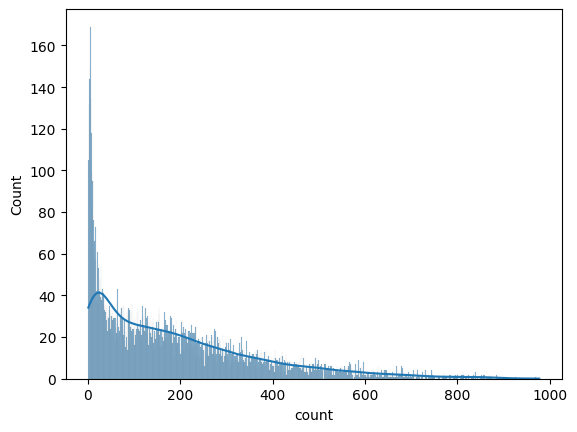

In [137]:
"""
데이터 훈련시 Log값을 취하는 이유??
우리가 결과 값으로 투입하는 Count값이 최저 값과 최고 값의 낙폭이 너무 커서
만약 log를 취하지 않고 해보면 print하는 결과 값이 inf(infinity)로 뜨게 됨
"""
## 그래프 해석 -> rmsle
''' 
1.	대여 수량이 적을수록 빈도수가 높음:
	- 그래프에서 0에 가까운 대여 수량이 가장 빈번하게 발생. 즉, 대부분의 경우 자전거 대여 수량이 매우 적음.
	- 자전거를 대여하지 않거나 매우 적은 수량이 대여되는 상황이 자주 나타남
2.	오른쪽 꼬리가 긴 분포:
	- 그래프가 왼쪽에 집중되어 있고 오른쪽으로 꼬리가 길게 이어지는 형태. 이 형태는 비대칭적인 분포로, 대여 수량이 클수록 발생 빈도는 매우 적다는 것을 의미.
3.	로그 분포가 필요할 수 있는 상황:
	- 이 그래프에서는 대여 수량이 0에 가까운 값에 몰려 있는 반면, 큰 값들이 긴 꼬리를 형성. 이런 경우에는 로그 변환을 통해 데이터의 스케일을 조정하여 더 균일한 분포를 만들수 있음.
'''
y = train['count'] 

#count값의 분포
sns.histplot(y,bins=range(y.min().astype('int'),y.max().astype('int')),kde=True)

#기존 훈련 데이터셋의 count의 개수
print(y.count()) #10886

""" 
3 sigma를 활용한 이상치 확인
참조 : https://ko.wikipedia.org/wiki/68-95-99.7_%EA%B7%9C%EC%B9%99
"""
#3시그마를 적용한 이상치를 배제한 훈련 데이터셋의 count의 개수
y[np.logical_and(y.mean()-3*y.std() <= y,y.mean()+3*y.std() >= y)].count() #10739
#이상치들이 존재할 때는 log를 활용하여 값을 도출

In [95]:
"""
GridSearchCV를 활용하면 우리가 이용하게 될 각각의 모델마다 변경해야 하는 파라미터 튜닝시 어떤 파라미터가 최적의 값을 내는지 등을 알 수 있음.

GridSearchCV 참조:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://datascienceschool.net/view-notebook/ff4b5d491cc34f94aea04baca86fbef8/
"""
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#Ridge모델은 L2제약을 가지는 선형회귀모델에서 개선된 모델이며 해당 모델에서 유의 깊게 튜닝해야하는 파라미터는 alpha값이다.
# l2 정규화 추가 버전의 선형 회귀 모델 - 가중치 제곱
ridge = Ridge()

#우리가 튜닝하고자하는 Ridge의 파라미터 중 특정 파라미터에 배열 값으로 넘겨주게 되면 테스트 후 어떤 파라미터가 최적의 값인지 알려줌 
ridge_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
rmsle_scorer = metrics.make_scorer(rmsle,greater_is_better=False)
grid_ridge = GridSearchCV(ridge,ridge_params,scoring=rmsle_scorer,cv=5)

grid_ridge.fit(X_train,y_log_train)
preds = grid_ridge.predict(X_val)
print(grid_ridge.best_params_)
print('RMSLE Value for Ridge Regression {}'.format(rmsle(np.exp(y_log_val),np.exp(preds),False)))

{'alpha': 10, 'max_iter': 3000}
RMSLE Value for Ridge Regression 0.9865726027239786


In [97]:
#결과에 대해 GridSearchCV의 변수인 grid_ridge변수에 cv_result_를 통해 alpha값의 변화에 따라 평균값의 변화를 파악 가능
df = pd.DataFrame(grid_ridge.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002774,0.001711,0.001908,0.000227,0.001,3000,"{'alpha': 0.001, 'max_iter': 3000}",-0.977754,-0.982470,-0.966956,-0.968284,-0.988239,-0.976741,0.008165,5
1,0.001545,0.000052,0.001586,0.000078,0.010,3000,"{'alpha': 0.01, 'max_iter': 3000}",-0.977754,-0.982470,-0.966956,-0.968284,-0.988239,-0.976741,0.008165,4
2,0.001820,0.000232,0.002312,0.001128,0.100,3000,"{'alpha': 0.1, 'max_iter': 3000}",-0.977755,-0.982470,-0.966956,-0.968283,-0.988238,-0.976741,0.008165,3
3,0.002009,0.000575,0.001657,0.000092,1.000,3000,"{'alpha': 1, 'max_iter': 3000}",-0.977759,-0.982467,-0.966957,-0.968281,-0.988236,-0.976740,0.008164,2
4,0.001622,0.000093,0.001543,0.000035,10.000,3000,"{'alpha': 10, 'max_iter': 3000}",-0.977797,-0.982436,-0.966962,-0.968255,-0.988214,-0.976733,0.008159,1
5,0.001657,0.000177,0.001681,0.000062,100.000,3000,"{'alpha': 100, 'max_iter': 3000}",-0.978204,-0.982198,-0.967165,-0.968216,-0.988071,-0.976771,0.008058,6
6,0.001555,0.000071,0.001569,0.000064,1000.000,3000,"{'alpha': 1000, 'max_iter': 3000}",-0.982877,-0.983146,-0.971643,-0.971570,-0.989768,-0.979801,0.007131,7


In [98]:
#Ridge모델은 L1제약을 가지는 선형회귀모델에서 개선된 모델이며 해당 모델에서 유의 깊게 튜닝해야하는 파라미터는 alpha값이다.
# l1 정규화 추가 버전의 선형 회귀 모델 - 가중치 절대값
lasso = Lasso()

lasso_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
grid_lasso = GridSearchCV(lasso,lasso_params,scoring=rmsle_scorer,cv=5)
grid_lasso.fit(X_train,y_log_train)
preds = grid_lasso.predict(X_val)
print('RMSLE Value for Lasso Regression {}'.format(rmsle(np.exp(y_log_val),np.exp(preds),False)))

RMSLE Value for Lasso Regression 0.9863661973127056


In [100]:
# 트리 기반 앙상블 모델 
rf = RandomForestRegressor()

rf_params = {'n_estimators':[1,10,100]}
grid_rf = GridSearchCV(rf,rf_params,scoring=rmsle_scorer,cv=5)
grid_rf.fit(X_train,y_log_train)
preds = grid_rf.predict(X_val)
print('RMSLE Value for RandomForest {}'.format(rmsle(np.exp(y_log_val),np.exp(preds),False)))

RMSLE Value for RandomForest 0.28872564595395445


Text(0.5, 1.0, 'Prediction')

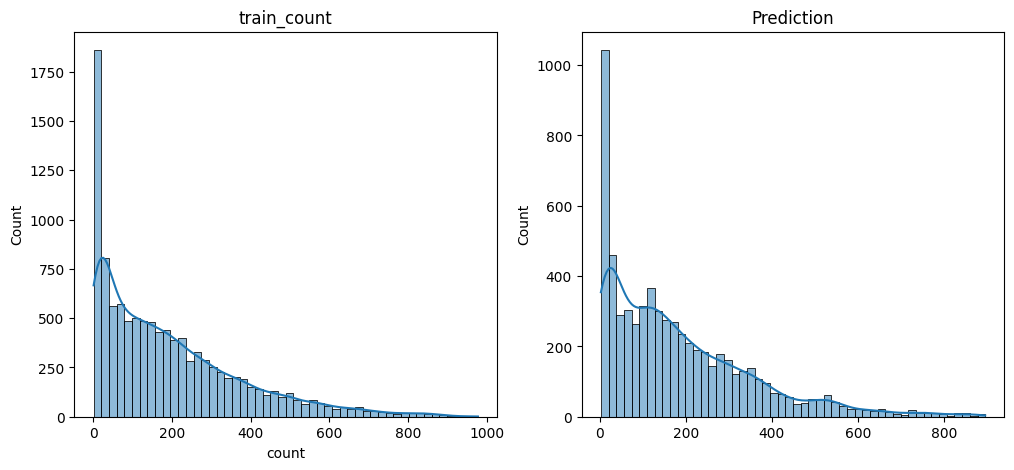

In [116]:
test = test[features]
predsTest = grid_rf.predict(test)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.histplot(y,ax=ax1,bins=50,kde=True)
ax1.set_title('train_count')
sns.histplot(np.exp(predsTest),ax=ax2,bins=50,kde=True)
ax2.set_title('Prediction')

In [106]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn_params = {'n_neighbors':range(1,11,1)}
grid_knn = GridSearchCV(knn,knn_params,scoring=rmsle_scorer,cv=5)
grid_knn.fit(X_train,y_log_train)
preds = grid_knn.predict(X_val)
print('RMSLE Value for KNeighbors {}'.format(rmsle(np.exp(y_log_val),np.exp(preds),False)))

RMSLE Value for KNeighbors 0.815348631258028


In [101]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_params={'max_depth':range(1,11,1),'n_estimators':[1,10,100]}
grid_gb=GridSearchCV(gb,gb_params,scoring=rmsle_scorer,cv=5)
grid_gb.fit(X_train,y_log_train)
preds = grid_gb.predict(X_val)
print('RMSLE Value for GradientBoosting {}'.format(rmsle(np.exp(y_log_val),np.exp(preds),False)))

RMSLE Value for GradientBoosting 0.2657765167873197


Text(0.5, 1.0, 'Prediction')

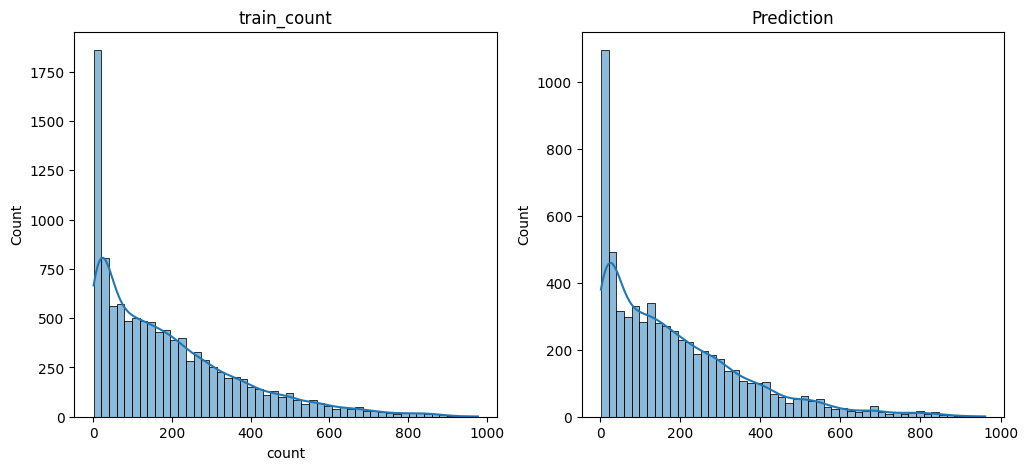

In [117]:
test = test[features]
predsTest = grid_gb.predict(test)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.histplot(y,ax=ax1,bins=50,kde=True)
ax1.set_title('train_count')
sns.histplot(np.exp(predsTest),ax=ax2,bins=50,kde=True)
ax2.set_title('Prediction')

In [103]:
from xgboost import XGBRegressor 
#best model -- 기존 코드와 성능이 다른 이유 : 학습데이터를 통째로 학습해서 과적합의 가능성이 있음.

xgb = XGBRegressor()
xgb_params = {'max_depth':range(1,11,1),'n_estimators':[1,10,100,], 'learning_rate':[0.001,0.01,0.1]}
grid_xgb = GridSearchCV(xgb,xgb_params,scoring=rmsle_scorer,cv=5)
grid_xgb.fit(X_train,y_log_train)
preds = grid_xgb.predict(X_val)
print('RMSLE Value for XGBoost {}'.format(rmsle(np.exp(y_log_val),np.exp(preds),False)))

RMSLE Value for XGBoost 0.26386241178358394


Text(0.5, 1.0, 'Prediction')

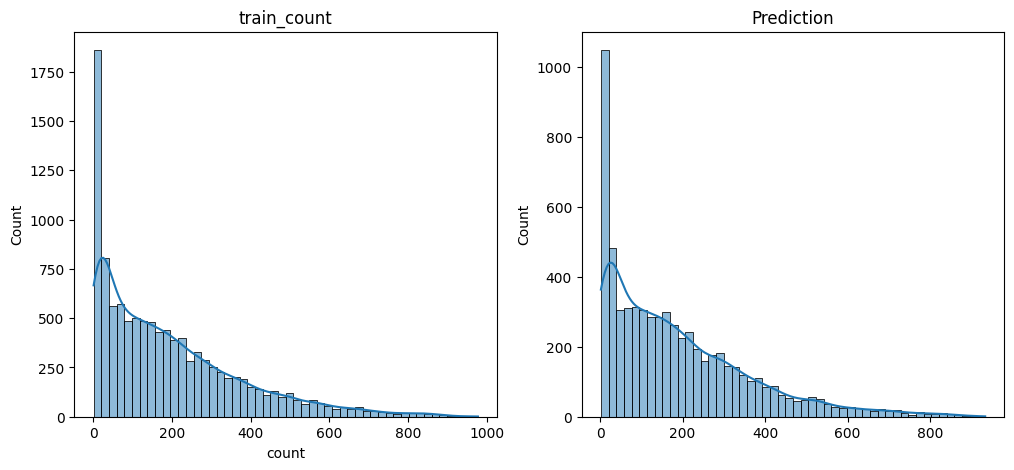

In [118]:
test = test[features]
predsTest = grid_xgb.predict(test)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.histplot(y,ax=ax1,bins=50,kde=True)
ax1.set_title('train_count')
sns.histplot(np.exp(predsTest),ax=ax2,bins=50,kde=True)
ax2.set_title('Prediction')

In [104]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm_params = {'max_depth':range(1,11,1),'n_estimators':[1,10,100], 'learning_rate':[0.001,0.01,0.1]}
grid_lgbm = GridSearchCV(lgbm,lgbm_params,scoring=rmsle_scorer,cv=5)
grid_lgbm.fit(X_train,y_log_train)
preds = grid_lgbm.predict(X_val)
print('RMSLE Value for LightGBM {}'.format(rmsle(np.exp(y_log_val),np.exp(preds),False)))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 512
[LightGBM] [Info] Number of data points in the train set: 6966, number of used features: 13
[LightGBM] [Info] Start training from score 4.594592
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 512
[LightGBM] [Info] Number of data points in the train set: 6966, number of used features: 13
[LightGBM] [Info] Start training from score 4.611958
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
Yo

### RMSE

In [129]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed','weekday', 'year','month','day','hour']
X = train[features]  # 입력 변수
y = train['count']   # 목표 변수 (자전거 대여 수)

# 2. 학습 데이터와 검증 데이터를 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression,Ridge,Lasso

lr = LinearRegression()

#선형 모델에 우리의 데이터를 학습
lr.fit(X_train,y_train)
#결과 값 도출
y_pred_lr = lr.predict(X_val)

# RMSE 계산
rmse_value = np.sqrt(mean_squared_error(y_val, y_pred_lr))

# 결과 출력
print(f"RMSE Value For Linear Regression: {rmse_value}")

RMSE Value For Linear Regression: 141.28756740203116


In [130]:
# ridge 모델 rmse gridsearchcv로 최적값 찾기
ridge = Ridge()

# ridge 모델의 파라미터
ridge_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
rmsle_scorer = metrics.make_scorer(rmsle,greater_is_better=False)
grid_ridge = GridSearchCV(ridge,ridge_params,scoring=rmsle_scorer,cv=5)

# ridge 모델 학습
grid_ridge.fit(X_train,y_train)
preds = grid_ridge.predict(X_val)
print(grid_ridge.best_params_)
print('RMSE Value for Ridge Regression {}'.format(np.sqrt(mean_squared_error(y_val, preds))))


{'alpha': 0.001, 'max_iter': 3000}
RMSE Value for Ridge Regression 141.28756725466394


In [131]:
# lasso 모델 rmse gridsearchcv로 최적값 찾기
lasso = Lasso()

# lasso 모델의 파라미터
lasso_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
grid_lasso = GridSearchCV(lasso,lasso_params,scoring=rmsle_scorer,cv=5)
grid_lasso.fit(X_train,y_train)
preds = grid_lasso.predict(X_val)
print('RMSE Value for Lasso Regression {}'.format(np.sqrt(mean_squared_error(y_val, preds))))

RMSE Value for Lasso Regression 141.28736962387836


In [132]:
# randomforest 모델 rmse gridsearchcv로 최적값 찾기
rf = RandomForestRegressor()

# randomforest 모델의 파라미터
rf_params = {'n_estimators':[1,10,100]}
grid_rf = GridSearchCV(rf,rf_params,scoring=rmsle_scorer,cv=5)
grid_rf.fit(X_train,y_train)
preds = grid_rf.predict(X_val)
print('RMSE Value for RandomForest {}'.format(np.sqrt(mean_squared_error(y_val, preds))))

RMSE Value for RandomForest 67.54261655062713


In [133]:
# knn 모델 rmse gridsearchcv로 최적값 찾기
knn = KNeighborsRegressor()
knn_params = {'n_neighbors':range(1,11,1)}
grid_knn = GridSearchCV(knn,knn_params,scoring=rmsle_scorer,cv=5)
grid_knn.fit(X_train,y_train)
preds = grid_knn.predict(X_val)
print('RMSE Value for KNeighbors {}'.format(np.sqrt(mean_squared_error(y_val, preds))))

RMSE Value for KNeighbors 143.19264188687134


In [134]:
# gradientboosting 모델 rmse gridsearchcv로 최적값 찾기
gb = GradientBoostingRegressor()
gb_params={'max_depth':range(1,11,1),'n_estimators':[1,10,100]}
grid_gb=GridSearchCV(gb,gb_params,scoring=rmsle_scorer,cv=5)
grid_gb.fit(X_train,y_train)
preds = grid_gb.predict(X_val)
print('RMSE Value for GradientBoosting {}'.format(np.sqrt(mean_squared_error(y_val, preds))))

RMSE Value for GradientBoosting 176.26388005976568


In [135]:
# xgboost 모델 rmse gridsearchcv로 최적값 찾기
xgb = XGBRegressor()
xgb_params = {'max_depth':range(1,11,1),'n_estimators':[1,10,100,], 'learning_rate':[0.001,0.01,0.1]}
grid_xgb = GridSearchCV(xgb,xgb_params,scoring=rmsle_scorer,cv=5)
grid_xgb.fit(X_train,y_train)
preds = grid_xgb.predict(X_val)
print('RMSE Value for XGBoost {}'.format(np.sqrt(mean_squared_error(y_val, preds))))

RMSE Value for XGBoost 181.62200623387523


In [136]:
# lightgbm 모델 rmse gridsearchcv로 최적값 찾기
lgbm = LGBMRegressor()
lgbm_params = {'max_depth':range(1,11,1),'n_estimators':[1,10,100], 'learning_rate':[0.001,0.01,0.1]}
grid_lgbm = GridSearchCV(lgbm,lgbm_params,scoring=rmsle_scorer,cv=5)
grid_lgbm.fit(X_train,y_train)
preds = grid_lgbm.predict(X_val)
print('RMSE Value for LightGBM {}'.format(np.sqrt(mean_squared_error(y_val, preds))))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 512
[LightGBM] [Info] Number of data points in the train set: 6966, number of used features: 13
[LightGBM] [Info] Start training from score 192.521964
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 512
[LightGBM] [Info] Number of data points in the train set: 6966, number of used features: 13
[LightGBM] [Info] Start training from score 193.500287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Lig